# Jupyter Notebook Walk Through

![Jupyter Logo](https://jupyter.org/assets/main-logo.svg "Jupyter Logo")

Jupyter Notebooks serve as a great environment to integrate code and discussion. They are built off of the [IPython](https://ipython.org/) programming environment and have two useful cells.

1. Markdown (i.e. this cell; for help, see the [cheat sheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet))
2. Code (Python, R or Julia)

## Precursors - How to Get Jupyter

I recommend using the [Anaconda Python](https://www.anaconda.com/download/) package manager which is available for all major operating systems. Once you have downloaded and installed Anaconda Python, you are set and ready to go. However, there are several other packages that are beneficial to install.

```bash
$ conda install jupyterlab # A newer jupyter environment
$ conda install nb_conda_kernels # Allows for switching conda environments from the notebook
$ conda install nbconvert # Allows exporting notebooks to other formats (such as HTML)
```

Or, these commands can be run all in one function call.

```bash
$ conda install jupyterlab nb_conda_kernels nbconvert
```

## Navigating a Notebook

Jupyter notebooks come with their own commands and keystrokes that are useful.

|    Command          |               Description               |    Keystroke    |
| :------------------ | :-------------------------------------- | :-------------: |
| Enter Cell          | Allows for editing of cell              |     `Enter`     |
| Exit Cell           | Exits cell edit mode                    |      `ESC`      |
| Run                 | Runs current cell                       | `Ctrl + Enter`  |
| Run and Enter       | Runs current cell and moves to next     | `Shift + Enter` |
| Run and Create      | Runs current cell and creates new below |  `Alt + Enter`  |
| Convert to Python   | Converts current cell to Python         |       `y`       |
| Convert to Markdown | Converts current cell to Markdown       |       `m`       |

## Writing Python Code

A wonderful feature of the notebook environment is the code integration and data visualization they provide. Note that Python cells are "tab completeable" since they are run with IPython and Jedi.

In [1]:
# Begin with IPython "magic" commands
# The following magic command allows for interactive plotting
# %matplotlib notebook
# %matplotlib inline  # Default plotting environment


# Imports
import numpy as np
import scipy as sp
import pandas as pd
import astropy.table
import sklearn.datasets
from matplotlib import pyplot as plt
from IPython.display import display, HTML

In [2]:
# First, let's import some data
digits = sklearn.datasets.load_digits()
iris   = sklearn.datasets.load_iris()

# Convert iris to DataFrame
irisClass, irisNames = iris.target, iris.target_names
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['class'] = np.choose(irisClass, irisNames)

# Note that notebooks feature integrated Printing
print('Number of Digits: {:d}'.format(digits.data.shape[0]))

# Also, Pandas DataFrames have pretty formatting
display(HTML(iris.to_html(max_rows=8)))

Number of Digits: 1797


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
...,...,...,...,...,...
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


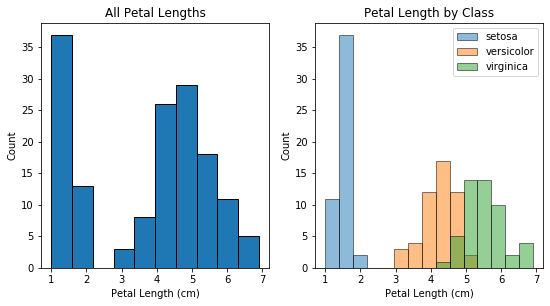

In [3]:
# Data is Available from Cell-to-Cell
# Let's make a histogram of the petal lengths in iris
fig, ax = plt.subplots(1, 2, figsize=(9, 4.5))
edges = np.histogram_bin_edges(iris['petal length (cm)'], 15)
_ = ax[0].hist(iris['petal length (cm)'], ec='k')
for label in np.unique(iris['class']):
    inds = label == iris['class']
    _ = ax[1].hist(iris['petal length (cm)'][inds], edges, ec='k', alpha=0.5, label=label)

# Titles and Such for All
_ = ax[0].set_title('All Petal Lengths')
_ = ax[0].set_xlabel('Petal Length (cm)')
_ = ax[0].set_ylabel('Count')

# Titles and Such for Classes
_ = ax[1].set_title('Petal Length by Class')
_ = ax[1].set_xlabel('Petal Length (cm)')
_ = ax[1].set_ylabel('Count')
_ = plt.legend()

Here we could add some discussion using a Markdown cell

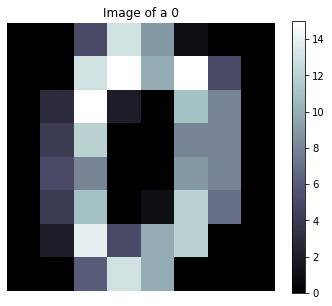

In [4]:
# Similarly, we can plot images
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
_ = plt.imshow(digits.images[0], cmap='bone')
_ = plt.title('Image of a {:d}'.format(digits.target[0]))
_ = plt.axis('off')
_ = plt.colorbar()

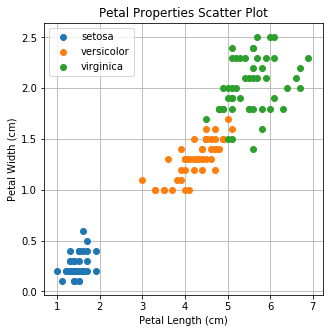

In [5]:
# Scatter Example
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for label in np.unique(iris['class']):
    inds = label == iris['class']
    _ = ax.scatter(iris['petal length (cm)'][inds],
                   iris['petal width (cm)'][inds],
                   label=label)
    
# Title and Such
_ = ax.set_title('Petal Properties Scatter Plot')
_ = ax.set_xlabel('Petal Length (cm)')
_ = ax.set_ylabel('Petal Width (cm)')
_ = ax.set_axisbelow(True)
_ = plt.grid(True)
_ = plt.legend()